KNN Algorithm

                                                    
Given a dataset of people with factors for diabetes, makes a prediction for the status of the people in the testset depending on the k nearest neighbours and checks the prediction returning a percentage of correctness for the algorithm

Imports

In [63]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Load Data

In [64]:
data = np.loadtxt('Downloads/diabets.csv',dtype=float, delimiter=',', skiprows=1)

 Process Data

In [65]:
trainingSet = data[:600]
testSet = data[600:]

Returns the distances from the current element of the test set to every training element

In [66]:
def ComputeDistancesToTrainingElements(testData, trainingSet):
    distances = {}
        
    for record in trainingSet:
        trainingData = record[:-1]
        distToElement = np.linalg.norm(testData - trainingData)
        distances[tuple(record)] = distToElement
    
    return distances

Counts the number of diabetics in the k nearest of the current element

In [67]:
def CountDiabeticsInKNearest(firstk):
    numOfDiabetics = 0
    for element in firstk:
        numOfDiabetics += element[0][-1]
    
    return numOfDiabetics

Compares the average distances to the nearest diabetics and non-diabetics (if count of diabetics is equal to count of non-diabetics in the k nearest)

In [68]:
def GuessByAverage(firstk):
    sumOfPos = 0
    sumOfNeg = 0
    for element in firstk:
        if element[0][-1] == 1: sumOfPos += element[1]
        else: sumOfNeg += element[1]
        
    return sumOfPos > sumOfNeg

Returns a guess for the element depending on the k nearest neighbours

In [69]:
def guess(testData, trainingSet, k):
    
    distances = ComputeDistancesToTrainingElements(testData, trainingSet)
    
    sortedDistances = sorted(distances.items(), key=lambda kv: kv[1])
    
    firstk = sortedDistances[:k]
    
    numOfDiabetics = CountDiabeticsInKNearest(firstk)
        
    if numOfDiabetics == k/2:
        return GuessByAverage(firstk)
    
    return numOfDiabetics > (k - numOfDiabetics)

Returns the percentage of correct predictions of the algorithm.
The algorithm compares the sum of distances to the diabetics and non-diabetics in the k nearest neighbours when their count is equal 

In [70]:
def KNN(k):
    correctPredictions = 0
    
    for row in testSet:
        testData = row[:-1]
        isDiabeticGuess = guess(testData, trainingSet, k)
        if(isDiabeticGuess == row[-1]): correctPredictions += 1
            
    return correctPredictions/testSet.shape[0] * 100 

Set up a list of values for k and a list of percentages of KNN with argument k

In [71]:
args = list(range(1,40))
vals = []
for arg in args:
    vals.append(KNN(arg))

A graph comparing the correctness of the algorithm for different values of k.
When the diabetics and non-diabetics are equal, the algorithm is comparing the sums of distances to the diabetics and non-diabetics

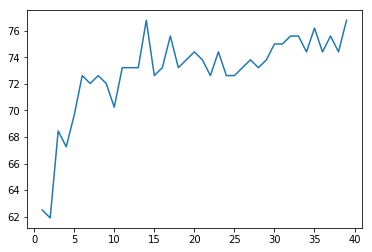

In [72]:
plt.plot(args, vals)

Guess with getting the value of the nearest neighbour when the diabetics and non-diabetics are equal

In [73]:
def guess2(testData, trainingSet, k):
    
    distances = ComputeDistancesToTrainingElements(testData, trainingSet)
    
    sortedDistances = sorted(distances.items(), key=lambda kv: kv[1])
    
    firstk = sortedDistances[:k]
    
    numOfDiabetics = CountDiabeticsInKNearest(firstk)
        
    if numOfDiabetics == k/2:
        return firstk[0][0][-1]
    
    isDiabeticGuess = numOfDiabetics > (k - numOfDiabetics)
    
    return isDiabeticGuess

Returns the percentage of correct predictions of the algorithm when using the value of the nearest neighbour in case of equal count of diabetics and non-diabetics

In [74]:
def KNN2(k):
    correctPredictions = 0
    for row in testSet:
        testData = row[:-1]
        isDiabeticGuess = guess2(testData, trainingSet, k)
        if(isDiabeticGuess == row[-1]): correctPredictions += 1
            
    return correctPredictions/testSet.shape[0] * 100 

In [75]:
vals2 = []

In [76]:
for arg in args:
    vals2.append(KNN2(arg))

A graph comparing the correctness of the algorithm for different values of k.
When the diabetics and non-diabetics are equal, the algorithm is using the value of the nearest neighbour

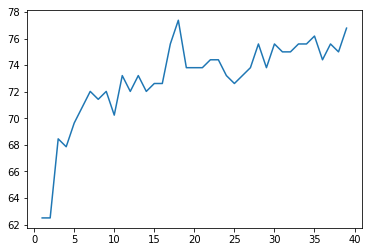

In [77]:
plt.plot(args, vals2)